# **Distancia de Mahalanobis**
Este código permite calcular la distancia de Mahalanobis utilizando tres fórmulas de covarianza:

- Covarianza habitual
- Covarianza de Ledoit and Wolf
- Minima curtosis

In [7]:
# Importar librerías
import numpy as np                                      # Funciones vectoriales
from scipy.spatial import distance                      # Calcular distancias
from sklearn.covariance import LedoitWolf, MinCovDet    # Calcular matrices de covarianza
import matplotlib.pyplot as plt                         # Gráficos y visualizaciones

# Conectar con almacenamiento en nbue
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
filepath = '/content/gdrive/MyDrive/Maestria/Algebra/Taller1/Matlab/38_Industry_Portfolios.xlsx'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### **Funciones de cálculo de distancia**
La primera función encuentra la distancia entre un punto *x* y la media vectorial. Esta distancia se calcula como la raíz del producto entre el vector diferencias transpuesto (*diff.T*), la matriz de covarianza inversa (*iCOV*) y el vector diferencia sin transponer (*diff*).

In [8]:
def dist(x, mean, iCOV):
  diff = x - mean
  return np.sqrt(diff.T @ iCOV @diff)

### **Método de covarianza**
En esta sección se escoge el método de cálculo de la matriz de convarianza



In [9]:
def multiple_dist(X, metodo):
  mean = np.mean(X, axis=0) 
  
  if metodo == 'habitual':
    COV = np.cov(X, rowvar=False)
    iCOV = np.linalg.inv(COV)
    
  elif metodo == 'ledoit_wolf':
    lw = LedoitWolf()
    lw.fit(X)
    COV = lw.covariance_
    iCOV = lw.precision_
  
  elif metodo == 'kurtosis_min':
    mcd = MinCovDet(assume_centered=False)
    mcd.fit(X)
    mean = mcd.location_
    COV = mcd.covariance_
    iCOV = mcd.precision_
  else:
    raise ValueError('Método inválido')

  return np.array([dist(x, mean, iCOV) for x in X])

### **Importar datos**

In [10]:
df = pd.read_excel(filepath)
df.set_index('date', inplace=True)
df.head()

,Agric,Mines,Oil,Stone,Cnstr,Food,Smoke,Txtls,Apprl,Wood,...,Utils,Garbg,Steam,Water,Whlsl,Rtail,Money,Srvc,Govt,Other
date,,,,,,,,,,,,,,,,,,,,,
1926-07-01,2.37,2.64,-2.69,9.64,-8.21,0.03,1.29,0.39,1.28,-99.99,...,7.04,-99.99,-99.99,-99.99,-23.79,0.14,-0.02,3.79,-99.99,-5.95
1926-08-01,2.23,0.67,3.78,0.77,7.37,3.07,6.50,7.97,1.54,-99.99,...,-1.69,-99.99,-99.99,-99.99,5.39,-0.72,4.47,-0.20,-99.99,0.00
1926-09-01,-0.57,-0.22,-5.92,7.47,-11.76,1.63,1.26,2.30,-2.42,-99.99,...,2.04,-99.99,-99.99,-99.99,-7.87,0.22,-1.61,5.56,-99.99,0.00
1926-10-01,-0.46,-0.34,-1.98,-2.78,-8.59,-3.67,1.06,1.00,-0.68,-99.99,...,-2.63,-99.99,-99.99,-99.99,-15.38,-2.28,-5.51,-4.47,-99.99,0.00
1926-11-01,6.75,1.58,0.91,17.23,2.25,6.28,4.55,3.10,4.48,-99.99,...,3.71,-99.99,-99.99,-99.99,4.67,6.43,2.34,2.22,-99.99,0.00


In [11]:
# Convertir dataframe a arreglo bidimensional (matriz)
data = df.to_numpy()
print(data)

[[  2.37   2.64  -2.69 ...   3.79 -99.99  -5.95]
 [  2.23   0.67   3.78 ...  -0.2  -99.99   0.  ]
 [ -0.57  -0.22  -5.92 ...   5.56 -99.99   0.  ]
 ...
 [-12.14  -3.79  -6.42 ...  -6.56  -3.02  -4.88]
 [ 10.    17.47   3.05 ...   9.95   1.95  -2.22]
 [ -3.35  -7.06  -9.91 ...  -2.    -2.3   -5.84]]


## **Resultados**

La siguiente gráfica permite comparar las distintas distancias para cada método de covarianza. Según la intensidad del color es la magnitud de la distancia.

Los valores atípicos serán segmentados en un gama de color distinto a la general.

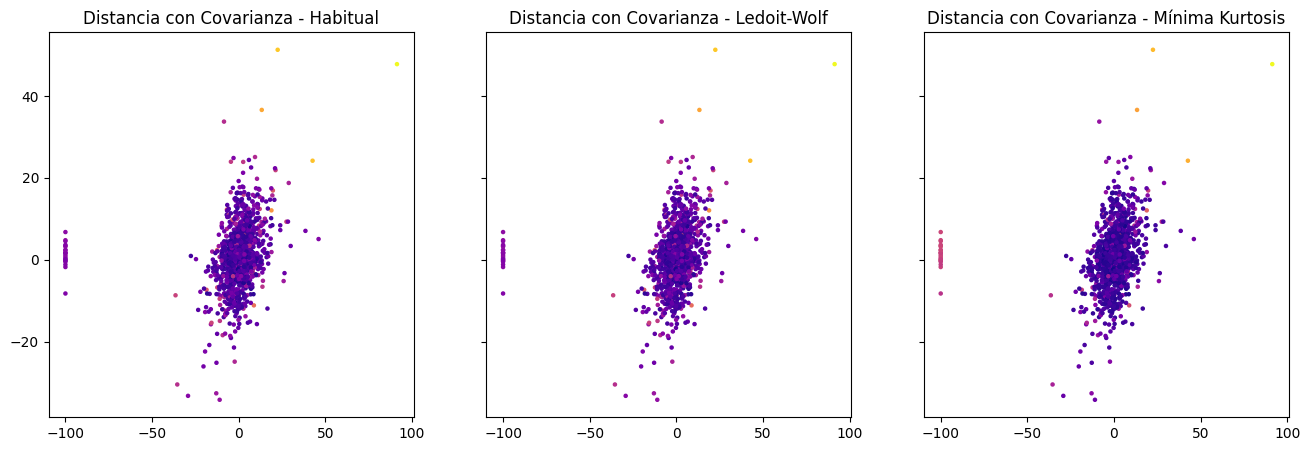

In [12]:
import warnings
warnings.filterwarnings("ignore")

# Calcular distancias de Mahalanobis
distances_regular = multiple_dist(data, 'habitual')
distances_ledoit_wolf = multiple_dist(data, 'ledoit_wolf')
distances_min_curtosis = multiple_dist(data, 'kurtosis_min')

# Graficar distancias
methods = ['Habitual', 'Ledoit-Wolf', 'Mínima Kurtosis']
distances_list = [distances_regular, distances_ledoit_wolf, distances_min_curtosis]
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)
for i, ax in enumerate(axes):
    ax.scatter(data[:, 0], data[:, 1], c=distances_list[i], cmap='plasma', s=5)
    ax.set_title(f'Distancia con Covarianza - {methods[i]}')
plt.show()


### ** Identificación de atípicos**
El mejor método identificado fue el cálculo de covarianza por kurtosis mínima. A continuación, se exponen los atípicos identificados por este método.

<Axes: >

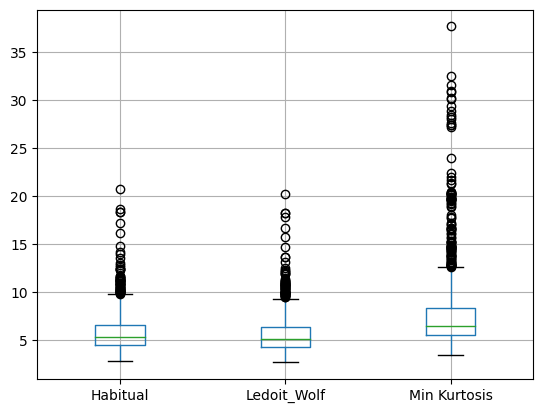

In [13]:
df_dist = pd.DataFrame()
df_dist['Habitual'] = distances_regular
df_dist['Ledoit_Wolf'] = distances_ledoit_wolf
df_dist['Min Kurtosis'] = distances_min_curtosis
df_dist.boxplot()